# Project Title
---

Group Name

Team members:
- Name
- Name
- Name

## Introduction 
__Introduction to the topic__ 

    ...

---

## Problem Statement

    ...

## Objectives:
__Questions that will guide the analysis to solve the problem__

    ...

---

## Exploratory Data Analysis (EDA):

### Data Info:
__Getting the data and exploring it (includes descriptive statistics)__

In [305]:
import pandas as pd

# Plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Interactive visualization library
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# N-D arrays & vectorized math
import numpy as np

In [306]:
athlets_events_df=pd.read_csv('olympics/athlete_events.csv')
                              
noc_regions_df= pd.read_csv('olympics/noc_regions.csv')

In [307]:
athlets_events_df.describe()


,ID,Age
count,271116.000000,261642.000000
mean,68248.954396,25.556898
std,39022.286345,6.393561
min,1.000000,10.000000
25%,34643.000000,21.000000
50%,68205.000000,24.000000
75%,102097.250000,28.000000
max,135571.000000,97.000000


In [308]:

athlets_events_df.dtypes

ID          int64
Name       object
Sex        object
Age       float64
Height     object
Weight     object
Team       object
NOC        object
Games      object
City       object
Sport      object
Event      object
Medal      object
dtype: object

In [309]:
noc_regions_df.head()


,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [310]:
print(athlets_events_df.shape)

print(athlets_events_df.isnull().sum())
athlets_events_df.isnull().mean()*100

(271116, 13)
ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64


ID         0.000000
Name       0.000000
Sex        0.000000
Age        3.494445
Height    22.193821
Weight    23.191180
Team       0.000000
NOC        0.000000
Games      0.000000
City       0.000000
Sport      0.000000
Event      0.000000
Medal     85.326207
dtype: float64

### Data Handling: 
__Cleaning, transforming, and combining data__

In [311]:
athlets_events_clean=athlets_events_df
athlets_events_clean.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,City,Sport,Event,Medal
0,1,A Dijiang,male,24.0,180.0cm,80.0kg,China,CHN,1992 Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,Male,23.0,170.0cm,60.0kg,China,CHN,2012 Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,Male,24.0,NaN,NaN,Denmark,DEN,1920 Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,FeMale,21.0,185.0cm,82.0kg,Netherlands,NED,1988 Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [312]:
athlets_events_clean['Height']=athlets_events_clean['Height'].str.replace('cm','').astype(float)

athlets_events_clean['Weight']=athlets_events_clean['Weight'].str.replace('kg','').astype(float)


In [313]:
athlets_events_clean.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,City,Sport,Event,Medal
0,1,A Dijiang,male,24.0,180.0,80.0,China,CHN,1992 Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,Male,23.0,170.0,60.0,China,CHN,2012 Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,Male,24.0,NaN,NaN,Denmark,DEN,1920 Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,FeMale,21.0,185.0,82.0,Netherlands,NED,1988 Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [314]:
athlets_events_clean

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,City,Sport,Event,Medal
0,1,A Dijiang,male,24.0,180.0,80.0,China,CHN,1992 Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,Male,23.0,170.0,60.0,China,CHN,2012 Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,Male,24.0,NaN,NaN,Denmark,DEN,1920 Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,FeMale,21.0,185.0,82.0,Netherlands,NED,1988 Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,male,27.0,176.0,59.0,Poland,POL,2014 Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,Male,27.0,176.0,59.0,Poland,POL,2014 Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,male,30.0,185.0,96.0,Poland,POL,1998 Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN


In [315]:
print(athlets_events_df['Weight'].mean())

weight_grouping=athlets_events_df.groupby('NOC')['Weight'].mean()

weight_grouping



70.70239290053351


NOC
AFG    65.901639
AHO    76.176471
ALB    71.491803
ALG    68.693252
AND    70.644444
         ...    
YEM    59.680000
YMD    63.333333
YUG    75.156326
ZAM    66.035971
ZIM    68.159170
Name: Weight, Length: 230, dtype: float64

In [316]:
athlets_events_clean.dtypes

athlets_events_clean.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,City,Sport,Event,Medal
0,1,A Dijiang,male,24.0,180.0,80.0,China,CHN,1992 Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,Male,23.0,170.0,60.0,China,CHN,2012 Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,Male,24.0,NaN,NaN,Denmark,DEN,1920 Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,FeMale,21.0,185.0,82.0,Netherlands,NED,1988 Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [317]:
athlets_events_clean.dropna(subset=["Age"],inplace=True)

# athlets_events_clean.drop(columns=["Medal"], inplace=True)

athlets_events_clean.shape


athlets_events_clean['Height'].fillna(athlets_events_df['Height'].mean(),inplace=True)

athlets_events_clean['Weight'].fillna(athlets_events_df['Weight'].mean(),inplace=True)

athlets_events_clean.isnull().sum()



C:\Users\yaqee\AppData\Local\Temp\ipykernel_29816\512720568.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  athlets_events_clean['Height'].fillna(athlets_events_df['Height'].mean(),inplace=True)
C:\Users\yaqee\AppData\Local\Temp\ipykernel_29816\512720568.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting valu

ID             0
Name           0
Sex            0
Age            0
Height         0
Weight         0
Team           0
NOC            0
Games          0
City           0
Sport          0
Event          0
Medal     222591
dtype: int64

In [318]:
#fixing the sex col:
for i, val in athlets_events_clean['Sex'].items():
    val = str(val).lower()
    if val in ['male', 'm']:
        athlets_events_clean.at[i, 'Sex'] = 'Male'
    elif val in ['female', 'f']:
        athlets_events_clean.at[i, 'Sex'] = 'Female'

In [319]:
athlets_events_clean['Sex'].unique()

#FIXED

array(['Male', 'Female'], dtype=object)

In [320]:
print(athlets_events_clean.isnull().sum())

ID             0
Name           0
Sex            0
Age            0
Height         0
Weight         0
Team           0
NOC            0
Games          0
City           0
Sport          0
Event          0
Medal     222591
dtype: int64


In [321]:
athlets_events_clean.dtypes




ID          int64
Name       object
Sex        object
Age       float64
Height    float64
Weight    float64
Team       object
NOC        object
Games      object
City       object
Sport      object
Event      object
Medal      object
dtype: object

In [322]:
athlets_events_clean.duplicated().sum()

athlets_events_clean.drop_duplicates(inplace=True)

In [323]:
athlets_events_clean.shape

(260416, 13)

In [324]:
noc_regions_df.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [325]:
noc_regions_df.isnull().sum()

noc_regions_clean= noc_regions_df



In [326]:
noc_regions_clean.isnull().sum()


NOC         0
region      3
notes     209
dtype: int64

In [327]:
noc_regions_clean.drop(columns=["notes"], inplace=True)

In [328]:
noc_regions_clean = noc_regions_clean.dropna(subset=["region"]).copy()


In [329]:
noc_regions_clean.isnull().sum()

noc_regions_clean




,NOC,region
0,AFG,Afghanistan
1,AHO,Curacao
2,ALB,Albania
3,ALG,Algeria
4,AND,Andorra
...,...,...
225,YEM,Yemen
226,YMD,Yemen
227,YUG,Serbia
228,ZAM,Zambia


In [330]:
athlets_events_clean.isna().sum()

ID             0
Name           0
Sex            0
Age            0
Height         0
Weight         0
Team           0
NOC            0
Games          0
City           0
Sport          0
Event          0
Medal     221372
dtype: int64

In [331]:
athlets_events_clean.head()



,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,City,Sport,Event,Medal
0,1,A Dijiang,Male,24.0,180.000000,80.000000,China,CHN,1992 Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,Male,23.0,170.000000,60.000000,China,CHN,2012 Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,Male,24.0,175.351367,70.712603,Denmark,DEN,1920 Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,Male,34.0,175.351367,70.712603,Denmark/Sweden,DEN,1900 Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,Female,21.0,185.000000,82.000000,Netherlands,NED,1988 Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [332]:

merged_df = pd.merge(athlets_events_clean,noc_regions_clean, on= 'NOC', how='left')

merged_df.isnull().sum()

merged_df


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,City,Sport,Event,Medal,region
0,1,A Dijiang,Male,24.0,180.000000,80.000000,China,CHN,1992 Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China
1,2,A Lamusi,Male,23.0,170.000000,60.000000,China,CHN,2012 Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China
2,3,Gunnar Nielsen Aaby,Male,24.0,175.351367,70.712603,Denmark,DEN,1920 Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark
3,4,Edgar Lindenau Aabye,Male,34.0,175.351367,70.712603,Denmark/Sweden,DEN,1900 Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark
4,5,Christine Jacoba Aaftink,Female,21.0,185.000000,82.000000,Netherlands,NED,1988 Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260411,135569,Andrzej ya,Male,29.0,179.000000,89.000000,Poland-1,POL,1976 Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN,Poland
260412,135570,Piotr ya,Male,27.0,176.000000,59.000000,Poland,POL,2014 Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN,Poland
260413,135570,Piotr ya,Male,27.0,176.000000,59.000000,Poland,POL,2014 Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN,Poland
260414,135571,Tomasz Ireneusz ya,Male,30.0,185.000000,96.000000,Poland,POL,1998 Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN,Poland


In [333]:
athlets_events_clean['season']= athlets_events_clean['Games']

### Analysis: 
__Answering the objectives through data analysis__



In [ ]:
#factors that influence winning a medal :
#does the athles age, gender, weight, hight effect winning?
# wich countries get the most medals. 
# medal counts across the years for the top 5 countries 
#Which sports have the most medals, and for which countries?


#gender in the olympics over time:
#count of each gender across decades
#sports with the highest/ lowest femal, female across decades
#womens medal across decades as the participation groew







In [ ]:
merged_df['Medal_Won'] = merged_df['Medal'].notna().astype(int)

merged_df.head()



,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,City,Sport,Event,Medal,region,Medal_Won
0,1,A Dijiang,Male,24.0,180.000000,80.000000,China,CHN,1992 Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,0
1,2,A Lamusi,Male,23.0,170.000000,60.000000,China,CHN,2012 Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,0
2,3,Gunnar Nielsen Aaby,Male,24.0,175.351367,70.712603,Denmark,DEN,1920 Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,0
3,4,Edgar Lindenau Aabye,Male,34.0,175.351367,70.712603,Denmark/Sweden,DEN,1900 Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,1
4,5,Christine Jacoba Aaftink,Female,21.0,185.000000,82.000000,Netherlands,NED,1988 Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,0


In [ ]:
#factors that influence winning a medal :
#does the athles age, gender, weight, hight effect winning?

sex_medals = merged_df.groupby(['Sex', 'Medal']).size().reset_index(name='Count')

sex_medals

# Age (binned)
#setting the bin
merged_df['AgeBin'] = pd.cut(merged_df['Age'], np.arange(10, 61, 5), include_lowest=True)
age_medals = merged_df.groupby(['AgeBin', 'Medal']).size().reset_index(name='Count')

age_medals

#setting the bin
merged_df['HeightBin'] = pd.cut(merged_df['Height'], np.arange(140, 211, 5), include_lowest=True)
#getting the lower (on the left) for a better visualization
merged_df['HeightBinLower'] = merged_df['HeightBin'].apply(lambda x: x.left )
height_medals = merged_df.groupby(['HeightBinLower', 'Medal']).size().reset_index(name='Count')

height_medals

merged_df['WeightBin'] = pd.cut(merged_df['Weight'], np.arange(40, 141, 5), include_lowest=True)
merged_df['WeightBinLower'] = merged_df['WeightBin'].apply(lambda x: x.left )
weight_medals = merged_df.groupby(['WeightBinLower', 'Medal']).size().reset_index(name='Count')

#weight_medals






C:\Users\yaqee\AppData\Local\Temp\ipykernel_29816\1371948677.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_medals = merged_df.groupby(['AgeBin', 'Medal']).size().reset_index(name='Count')
C:\Users\yaqee\AppData\Local\Temp\ipykernel_29816\1371948677.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  height_medals = merged_df.groupby(['HeightBinLower', 'Medal']).size().reset_index(name='Count')
C:\Users\yaqee\AppData\Local\Temp\ipykernel_29816\1371948677.py:25: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False t

,HeightBinLower,Medal,Count
0,139.999,Bronze,19
1,139.999,Gold,26
2,139.999,Silver,24
3,145.000,Bronze,60
4,145.000,Gold,56
5,145.000,Silver,52
6,150.000,Bronze,114
7,150.000,Gold,116
8,150.000,Silver,129
9,155.000,Bronze,422


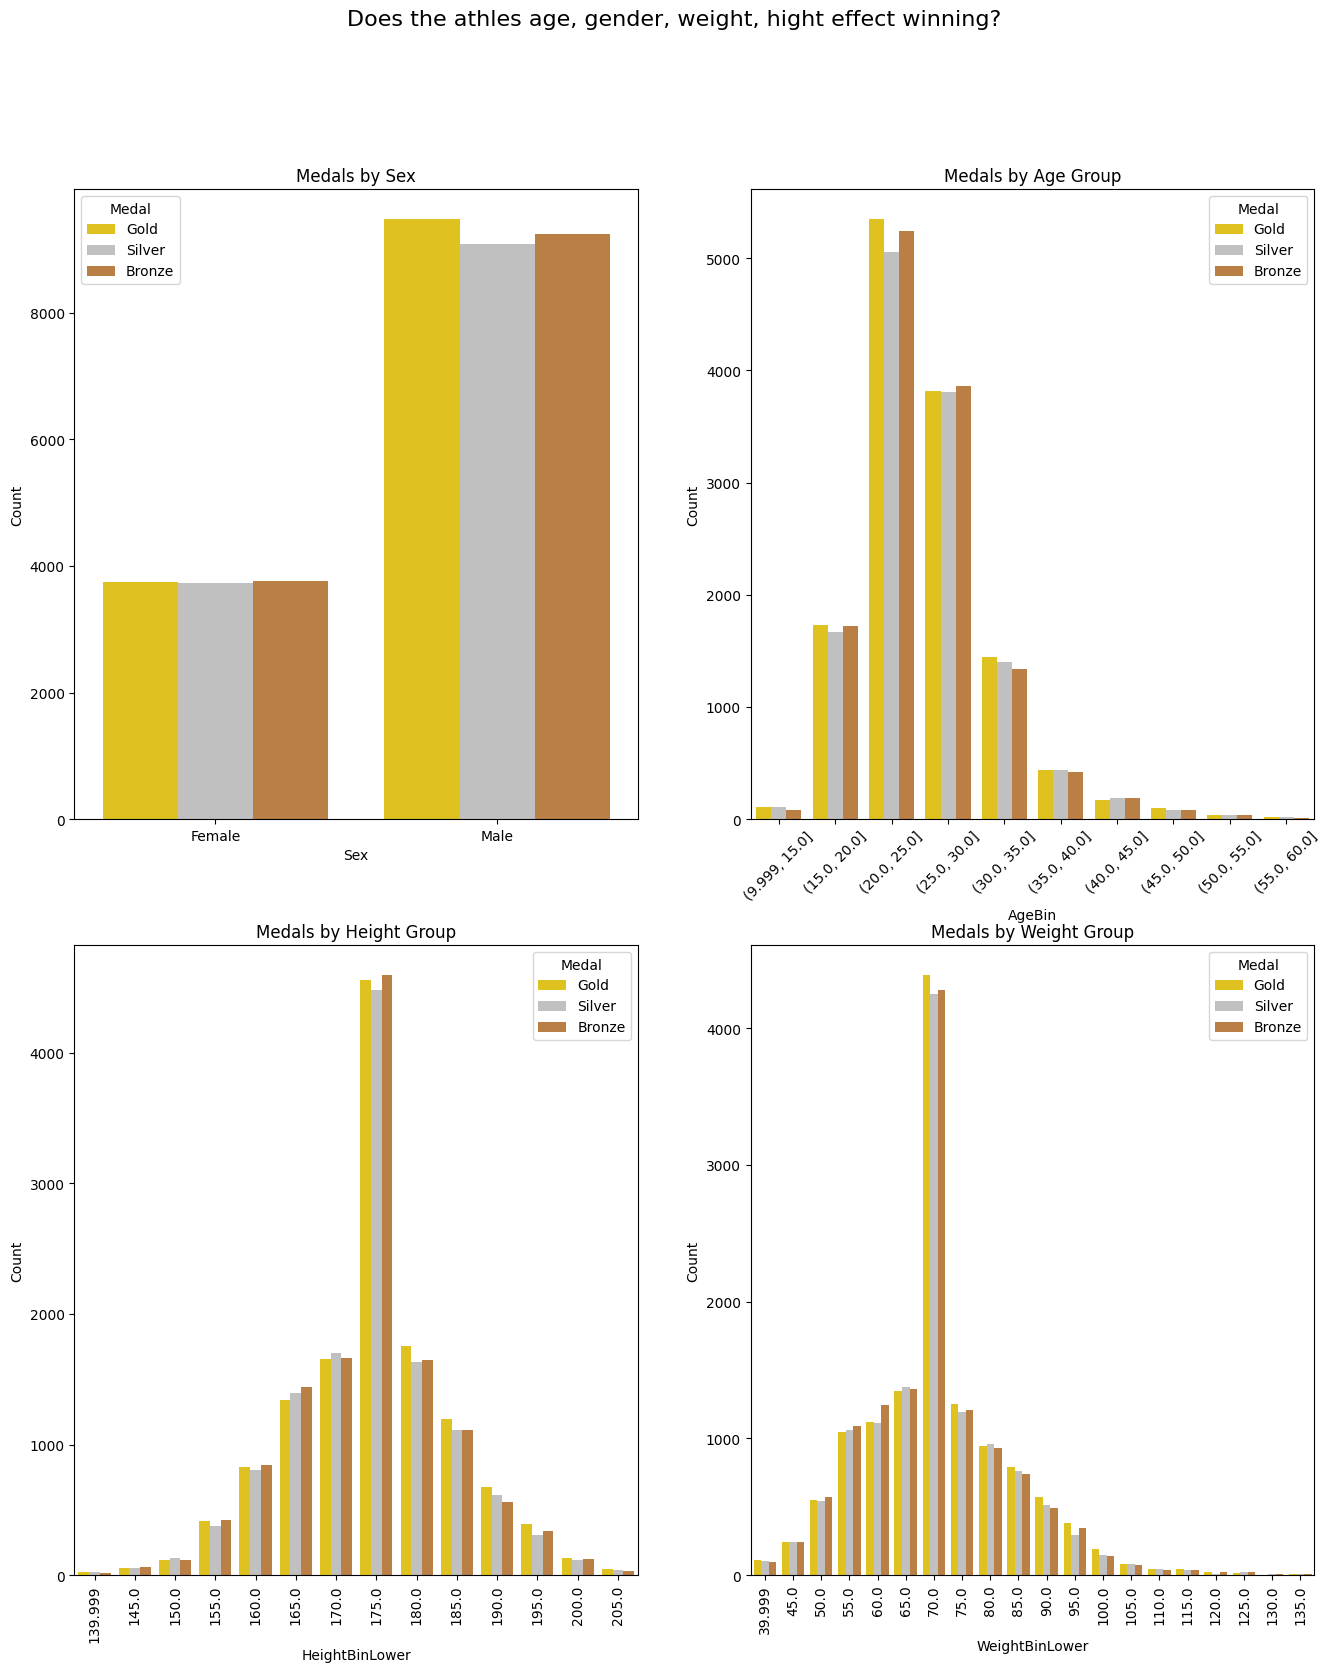

In [370]:
#visualize it:

#for the colors : 
medal_colors = {
    "Gold":   "#FFD700",   # gold
    "Silver": "#C0C0C0",   # silver
    "Bronze": "#CD7F32"    # bronze
}


fig, axs = plt.subplots(2, 2, figsize=(16, 18))
fig.suptitle('Does the athles age, gender, weight, hight effect winning?', fontsize=16)

#sex
sns.barplot(data=sex_medals, x='Sex', y='Count', hue='Medal',
            hue_order=['Gold','Silver','Bronze'], ax=axs[0,0], 
            palette=medal_colors,)
axs[0,0].set_title("Medals by Sex")

# age
sns.barplot(data=age_medals, x='AgeBin', y='Count', hue='Medal',
            hue_order=['Gold','Silver','Bronze'], ax=axs[0,1], palette=medal_colors,)
axs[0,1].set_title("Medals by Age Group")
axs[0,1].tick_params(axis='x', rotation=45)

# height
sns.barplot(data=height_medals, x='HeightBinLower', y='Count', hue='Medal',
            hue_order=['Gold','Silver','Bronze'], ax=axs[1,0],palette=medal_colors,)
axs[1,0].set_title("Medals by Height Group")
axs[1,0].tick_params(axis='x', rotation=90)

# Weight
sns.barplot(data=weight_medals, x='WeightBinLower', y='Count', hue='Medal',
            hue_order=['Gold','Silver','Bronze'], ax=axs[1,1], palette=medal_colors,)
axs[1,1].set_title("Medals by Weight Group")
axs[1,1].tick_params(axis='x', rotation=90)

In [372]:
#factors that influence winning a medal :
# wich countries get the most medals. / what sports they are best in 

merged_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,City,Sport,Event,Medal,region,Medal_Won,AgeBin,HeightBin,WeightBin,HeightBinLower,WeightBinLower
0,1,A Dijiang,Male,24.0,180.000000,80.000000,China,CHN,1992 Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,0,"(20.0, 25.0]","(175.0, 180.0]","(75.0, 80.0]",175.0,75.0
1,2,A Lamusi,Male,23.0,170.000000,60.000000,China,CHN,2012 Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,0,"(20.0, 25.0]","(165.0, 170.0]","(55.0, 60.0]",165.0,55.0
2,3,Gunnar Nielsen Aaby,Male,24.0,175.351367,70.712603,Denmark,DEN,1920 Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,0,"(20.0, 25.0]","(175.0, 180.0]","(70.0, 75.0]",175.0,70.0
3,4,Edgar Lindenau Aabye,Male,34.0,175.351367,70.712603,Denmark/Sweden,DEN,1900 Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,1,"(30.0, 35.0]","(175.0, 180.0]","(70.0, 75.0]",175.0,70.0
4,5,Christine Jacoba Aaftink,Female,21.0,185.000000,82.000000,Netherlands,NED,1988 Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,0,"(20.0, 25.0]","(180.0, 185.0]","(80.0, 85.0]",180.0,80.0


In [397]:
region_medals = merged_df.groupby(['region', 'Medal']).size().reset_index(name='Count')

region_medals

#now i need to get total medals by region : 
region_total = (region_medals.groupby('region')['Count'].sum().reset_index(name='number of wins')
                .sort_values(by='number of wins', ascending=False))

region_total

top10_regions = region_total.head(10)

top10_regions




,region,number of wins
123,USA,5592
98,Russia,3944
41,Germany,3723
122,UK,1964
38,France,1675
56,Italy,1598
110,Sweden,1536
4,Australia,1344
18,Canada,1327
48,Hungary,1134


C:\Users\yaqee\AppData\Local\Temp\ipykernel_29816\3463803463.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


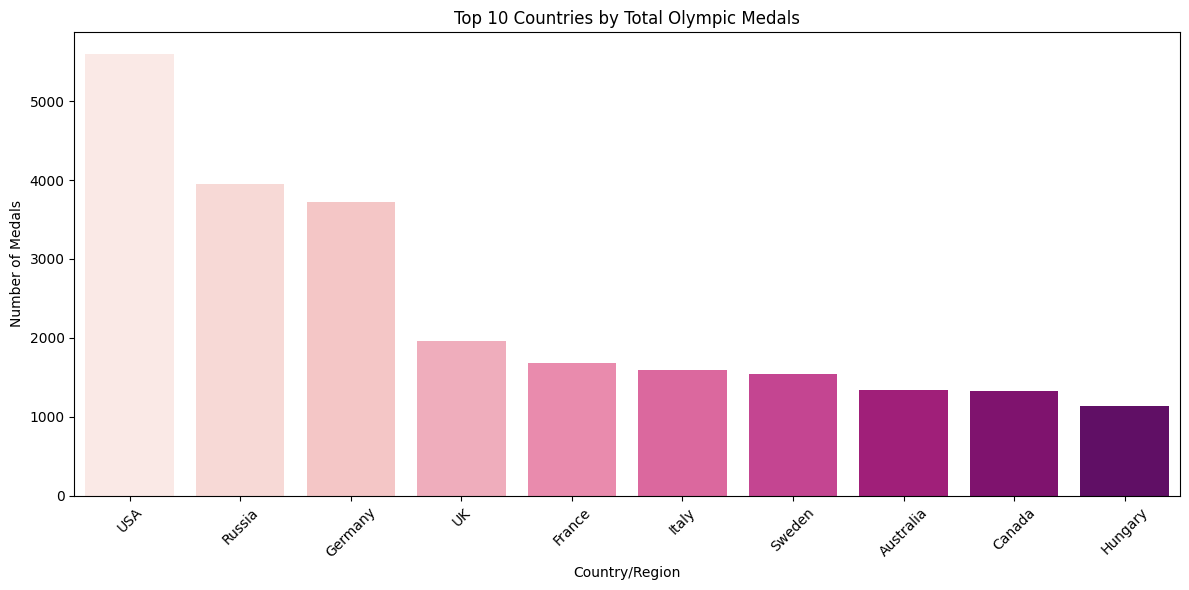

In [401]:
#visualizing it:
plt.figure(figsize=(12,6))


sns.barplot(
    data=top10_regions,
    x='region', y='number of wins',
    palette='RdPu'
    
)


plt.title("Top 10 Countries by Total Olympic Medals")
plt.xlabel("Country/Region")
plt.ylabel("Number of Medals")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
#How do medal counts change across years for the top 5 countries?

#line polt, x is the time, y the wins, lines for the top 10 countries. 

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,City,Sport,Event,Medal,region,Medal_Won,AgeBin,HeightBin,WeightBin,HeightBinLower,WeightBinLower
0,1,A Dijiang,Male,24.0,180.000000,80.000000,China,CHN,1992 Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,0,"(20.0, 25.0]","(175.0, 180.0]","(75.0, 80.0]",175.0,75.0
1,2,A Lamusi,Male,23.0,170.000000,60.000000,China,CHN,2012 Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,0,"(20.0, 25.0]","(165.0, 170.0]","(55.0, 60.0]",165.0,55.0
2,3,Gunnar Nielsen Aaby,Male,24.0,175.351367,70.712603,Denmark,DEN,1920 Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,0,"(20.0, 25.0]","(175.0, 180.0]","(70.0, 75.0]",175.0,70.0
3,4,Edgar Lindenau Aabye,Male,34.0,175.351367,70.712603,Denmark/Sweden,DEN,1900 Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,1,"(30.0, 35.0]","(175.0, 180.0]","(70.0, 75.0]",175.0,70.0
4,5,Christine Jacoba Aaftink,Female,21.0,185.000000,82.000000,Netherlands,NED,1988 Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,0,"(20.0, 25.0]","(180.0, 185.0]","(80.0, 85.0]",180.0,80.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260411,135569,Andrzej ya,Male,29.0,179.000000,89.000000,Poland-1,POL,1976 Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN,Poland,0,"(25.0, 30.0]","(175.0, 180.0]","(85.0, 90.0]",175.0,85.0
260412,135570,Piotr ya,Male,27.0,176.000000,59.000000,Poland,POL,2014 Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN,Poland,0,"(25.0, 30.0]","(175.0, 180.0]","(55.0, 60.0]",175.0,55.0
260413,135570,Piotr ya,Male,27.0,176.000000,59.000000,Poland,POL,2014 Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN,Poland,0,"(25.0, 30.0]","(175.0, 180.0]","(55.0, 60.0]",175.0,55.0
260414,135571,Tomasz Ireneusz ya,Male,30.0,185.000000,96.000000,Poland,POL,1998 Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN,Poland,0,"(25.0, 30.0]","(180.0, 185.0]","(95.0, 100.0]",180.0,95.0


In [413]:
merged_df.Medal.unique()

array([nan, 'Gold', 'Bronze', 'Silver'], dtype=object)

In [437]:
#factors that influence winning a medal :
# Which sports have the most medals, and for which countries?

regions_sports_best=merged_df[merged_df.Medal.notna()].groupby(['region','Sport']).size().reset_index(name='number of wins').sort_values(by=['region','number of wins'], ascending=False)

# only top sport per country

#Group by multiple columns finding only the max of each grouping and reseting the index to the multi-index it was before
topsports=regions_sports_best.loc[regions_sports_best.groupby(['region'])['number of wins'].idxmax()].sort_values(by='number of wins', ascending=False)

top10sports=topsports.head(10)
top10sports


,region,Sport,number of wins
1231,USA,Swimming,1078
482,Germany,Rowing,470
49,Australia,Swimming,409
907,Russia,Gymnastics,399
586,Italy,Fencing,358
199,Canada,Ice Hockey,348
1149,UK,Athletics,336
422,France,Fencing,307
748,Netherlands,Hockey,255
528,Hungary,Fencing,236


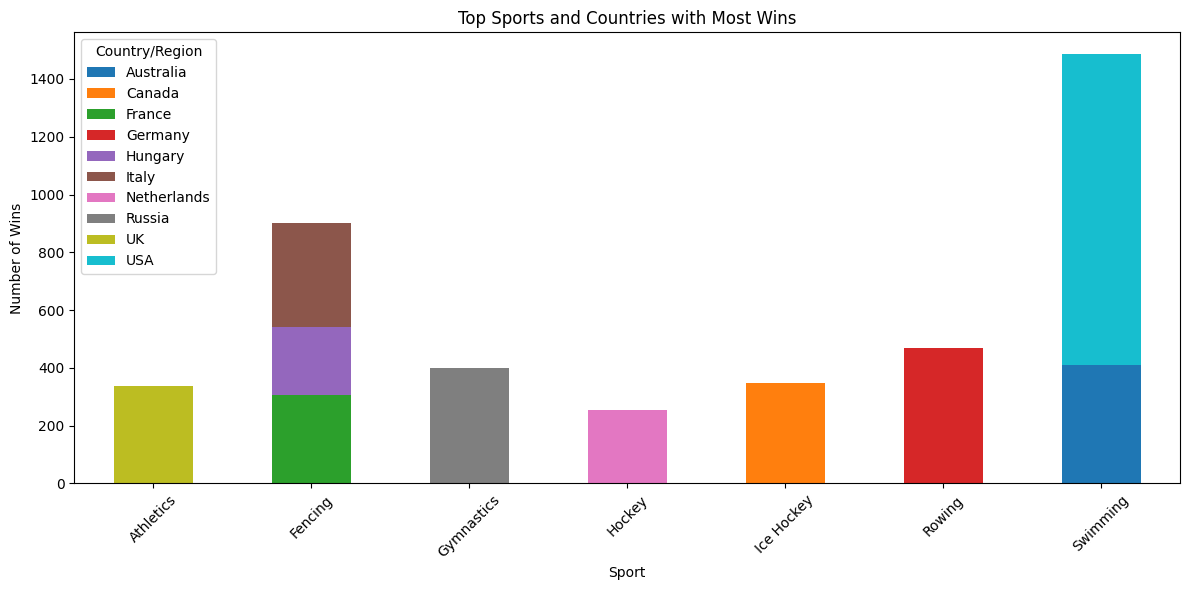

In [438]:
#visualizing it:
#stacked bar, x: sports , y: number of wins  , bars are the countries 

#we will make a pivot table: 
#sports are rows, regions are columns and the inner values are the number of wins
pivot_df = top10sports.pivot(index='Sport', columns='region', values='number of wins')

# Plot stacked bar
pivot_df.plot(kind='bar', stacked=True, figsize=(12,6))

plt.title("Top Sports and Countries with Most Wins")
plt.xlabel("Sport")
plt.ylabel("Number of Wins")
plt.xticks(rotation=45)
plt.legend(title="Country/Region")
plt.tight_layout()
plt.show()

In [433]:
merged_df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,City,Sport,Event,Medal,region,Medal_Won,AgeBin,HeightBin,WeightBin,HeightBinLower,WeightBinLower
0,1,A Dijiang,Male,24.0,180.000000,80.000000,China,CHN,1992 Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,0,"(20.0, 25.0]","(175.0, 180.0]","(75.0, 80.0]",175.0,75.0
1,2,A Lamusi,Male,23.0,170.000000,60.000000,China,CHN,2012 Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,0,"(20.0, 25.0]","(165.0, 170.0]","(55.0, 60.0]",165.0,55.0
2,3,Gunnar Nielsen Aaby,Male,24.0,175.351367,70.712603,Denmark,DEN,1920 Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,0,"(20.0, 25.0]","(175.0, 180.0]","(70.0, 75.0]",175.0,70.0
3,4,Edgar Lindenau Aabye,Male,34.0,175.351367,70.712603,Denmark/Sweden,DEN,1900 Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,1,"(30.0, 35.0]","(175.0, 180.0]","(70.0, 75.0]",175.0,70.0
4,5,Christine Jacoba Aaftink,Female,21.0,185.000000,82.000000,Netherlands,NED,1988 Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,0,"(20.0, 25.0]","(180.0, 185.0]","(80.0, 85.0]",180.0,80.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260411,135569,Andrzej ya,Male,29.0,179.000000,89.000000,Poland-1,POL,1976 Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN,Poland,0,"(25.0, 30.0]","(175.0, 180.0]","(85.0, 90.0]",175.0,85.0
260412,135570,Piotr ya,Male,27.0,176.000000,59.000000,Poland,POL,2014 Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN,Poland,0,"(25.0, 30.0]","(175.0, 180.0]","(55.0, 60.0]",175.0,55.0
260413,135570,Piotr ya,Male,27.0,176.000000,59.000000,Poland,POL,2014 Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN,Poland,0,"(25.0, 30.0]","(175.0, 180.0]","(55.0, 60.0]",175.0,55.0
260414,135571,Tomasz Ireneusz ya,Male,30.0,185.000000,96.000000,Poland,POL,1998 Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN,Poland,0,"(25.0, 30.0]","(180.0, 185.0]","(95.0, 100.0]",180.0,95.0


In [ ]:
#gender in the olympics over time:
#count of each gender across decades
athlets_events_clean[['year', 'season']] = (
    athlets_events_clean['Games'].str.split(" ", expand=True)
)

athlets_events_clean['year'] = athlets_events_clean['year'].astype(int)


In [ ]:
hist_bins = (athlets_events_clean['year'].max() - athlets_events_clean['year'].min()) // 10
hist_bins

In [ ]:
male_athletes = athlets_events_clean[(athlets_events_clean['Sex']=='Male')]
male_athletes.dtypes

In [ ]:
male_athletes = athlets_events_clean[(athlets_events_clean['Sex']=='Male')]
female_athletes = athlets_events_clean[(athlets_events_clean['Sex']=='Female')]


#  x is the decade, y is the number of male

# Plot histogram
male_athletes['year'].plot(
    kind="hist",
    bins=hist_bins,               # number of bins (intervals)
    color="skyblue",
    edgecolor="black",
    figsize=(8,5),
    label="Male"
)

female_athletes['year'].plot(
    kind="hist",
    bins=hist_bins,               # number of bins (intervals)
    color="pink",
    edgecolor="black",
    figsize=(8,5),
    label="Female"
)

plt.title("Participation of Athletes By Gender")
plt.xlabel("Decade")
plt.legend()
plt.ylabel("Number of Athletes")
plt.show()

In [ ]:
#sports with the highest/ lowest femal, female across decades
athlets_events_clean[['year', 'season']] = (
    athlets_events_clean['Games'].str.split(" ", expand=True)
)

athlets_events_clean['year'] = athlets_events_clean['year'].astype(int)
athlets_events_clean['Decade'] = (athlets_events_clean['year'] // 10) * 10



Female=athlets_events_clean[(athlets_events_clean['Sex']=='Female')]

heatmap_data = Female.pivot_table(
    index="Sport", 
    columns='Decade', 
    values="ID",      # assuming each athlete has a unique ID
    aggfunc="count",
    fill_value=0
)

plt.figure(figsize=(14,8))
sns.heatmap(heatmap_data, cmap="YlGnBu", linewidths=0.5)

plt.title("Female Athletes Participation by Sport and Decade", fontsize=14, fontweight="bold")
plt.xlabel("Decade")
plt.ylabel("Sport")
plt.tight_layout()
plt.show()

In [ ]:
#womens medal across decades as the participation groew
merged_df['Medal_Won'] = merged_df['Medal'].notna().astype(int)
merged_df['Medal_Won'].dtypes

In [ ]:
athlets_events_clean.head()

In [ ]:
female_athletes = merged_df[(merged_df['Sex']=='Female') & (merged_df['Medal_Won']==1)]


#  x is the decade, y is the number of female

# Plot histogram

female_athletes['year'].plot(
    kind="hist",
    bins='Decade',               # number of bins (intervals)
    color="pink",
    edgecolor="black",
    figsize=(8,5),
    label="Female"
)

plt.title("Participation of Female Athletes")
plt.xlabel("Decade")
plt.legend()
plt.ylabel("Medal")
plt.show()

---

## Summary
__Summarizing the key insights from the analysis__

**Note**: _Use Bullet Points_

    ...

## Recommendations/Conclusion
**Note**: _Use Bullet Points_

    ...